# Temperature Modeling

In [1]:
import numpy  as np;
import pandas as pd;
import datetime as dt;
import matplotlib.pyplot as plt;
%matplotlib inline
from matplotlib.pylab import rcParams;
rcParams['figure.figsize']=20,6
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose;
import itertools
import warnings
warnings.filterwarnings('ignore')

# We will work on temperature data of 
## Meghalaya

Loading the data

In [2]:
temp_data_matrix=pd.read_excel('seasonal data.xls', sheetname='Minimum Temperature');

In [3]:
temp_data_matrix.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1901,10.048,12.167,16.195,20.599,21.546,23.642,24.098,23.871,23.374,21.354,15.916,12.000
1,1902,10.848,12.070,17.217,18.545,21.575,22.868,24.001,23.974,23.349,20.106,15.294,11.397
2,1903,9.776,11.452,15.621,20.599,21.797,22.695,24.505,23.026,23.223,21.671,16.516,12.000
3,1904,10.298,12.347,17.416,19.521,20.826,23.649,23.804,23.627,23.422,20.753,15.820,11.345
4,1905,9.922,9.272,14.692,17.971,21.478,23.417,24.249,23.449,23.723,21.050,16.168,11.897


In [4]:
temp_data_matrix.set_index("Year",inplace=True); #year column set as index
temp_data_matrix=temp_data_matrix.transpose();
print(temp_data_matrix.head())


Year    1901    1902    1903    1904    1905    1906    1907    1908    1909  \
Jan   10.048  10.848   9.776  10.298   9.922  10.122  11.792  10.548  10.422   
Feb   12.167  12.070  11.452  12.347   9.272  11.772  11.316  11.823  12.115   
Mar   16.195  17.217  15.621  17.416  14.692  14.777  14.948  17.016  17.993   
Apr   20.599  18.545  20.599  19.521  17.971  20.367  18.545  21.694  19.044   
May   21.546  21.575  21.797  20.826  21.478  22.276  21.295  21.318  21.740   

Year    1910  ...    1993    1994    1995    1996    1997    1998    1999  \
Jan   10.270  ...   9.850  12.062  10.978  11.389  10.694  10.873  12.292   
Feb   11.793  ...  12.621  12.249  13.076  13.583  11.763  14.365  16.315   
Mar   15.695  ...  15.289  16.895  18.227  17.531  17.518  16.545  17.796   
Apr   17.745  ...  18.847  20.019  21.170  21.677  19.073  22.667  21.647   
May   21.474  ...  19.932  22.507  23.067  21.374  22.122  23.574  21.744   

Year    2000    2001    2002  
Jan   11.190  11.129  11.

In [5]:
dates = pd.date_range(start='1901-01', freq='MS', periods=len(temp_data_matrix.columns)*12)
dates


DatetimeIndex(['1901-01-01', '1901-02-01', '1901-03-01', '1901-04-01',
               '1901-05-01', '1901-06-01', '1901-07-01', '1901-08-01',
               '1901-09-01', '1901-10-01',
               ...
               '2002-03-01', '2002-04-01', '2002-05-01', '2002-06-01',
               '2002-07-01', '2002-08-01', '2002-09-01', '2002-10-01',
               '2002-11-01', '2002-12-01'],
              dtype='datetime64[ns]', length=1224, freq='MS')

## Minimum Tempertaure across all years-monthly

Text(0.5, 1.0, 'Monthly minimum temperature across all years')

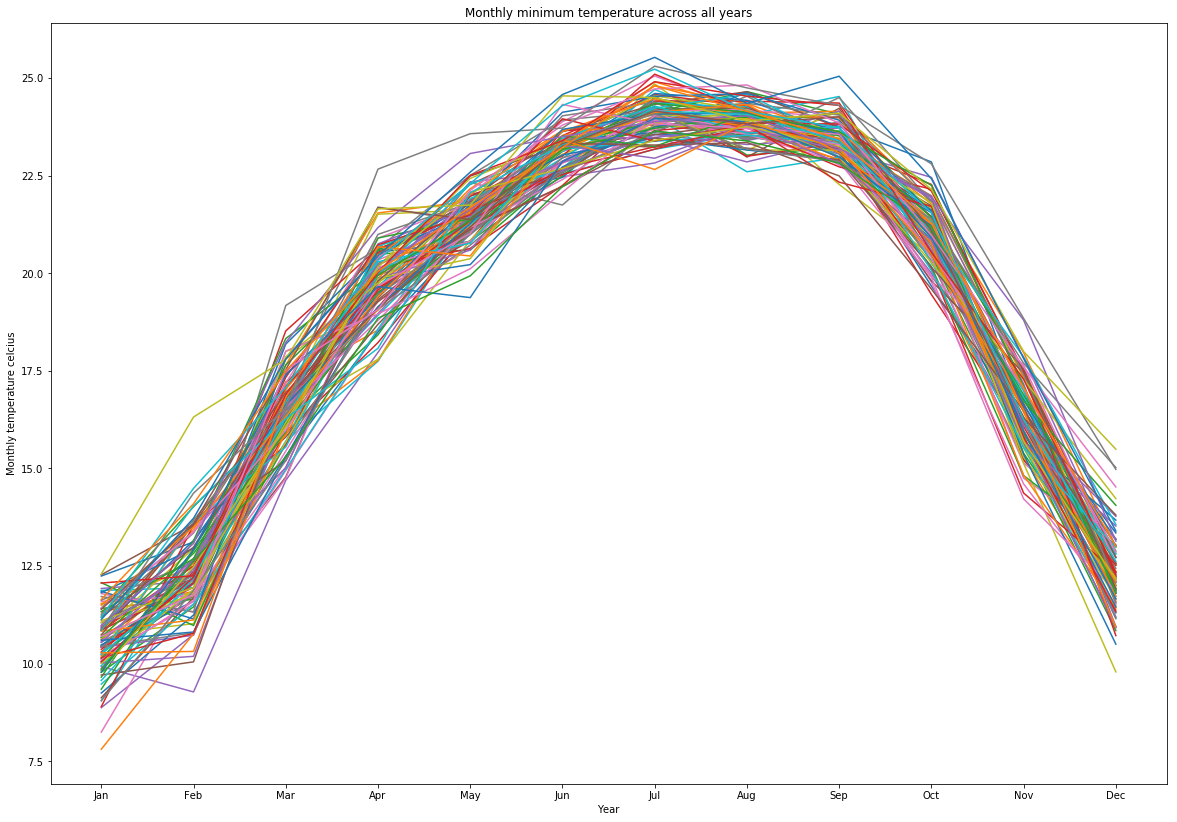

In [6]:
plt.figure(figsize=(20,14))
plt.plot(temp_data_matrix)

plt.xlabel('Year')
plt.ylabel('Monthly temperature celcius')

plt.title('Monthly minimum temperature across all years')


## Box plot for minimum temperature across all years 

Text(0.5, 1.0, 'Monthly minimum temperature across all years')

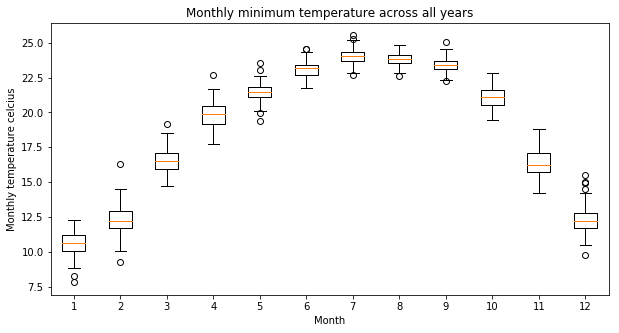

In [7]:
plt.figure(figsize=(10,5))
plt.boxplot(temp_data_matrix)
plt.xlabel('Month')
plt.ylabel('Monthly temperature celcius')

plt.title('Monthly minimum temperature across all years')


In [8]:
import seaborn as sns

# Heatmap of minimum tempertaure data

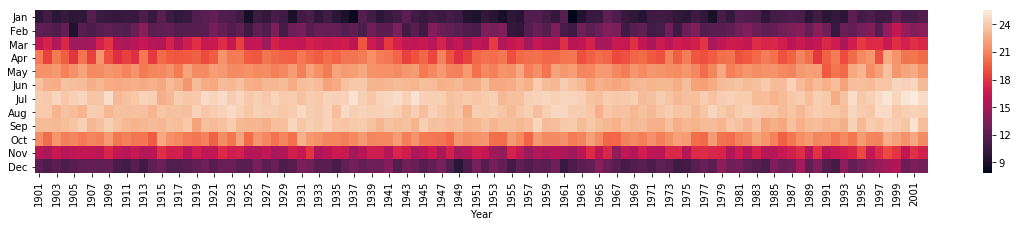

In [15]:
fig=plt.figure(figsize=(20,3))
sns.heatmap(temp_data_matrix)

# Hierarchical Clustering

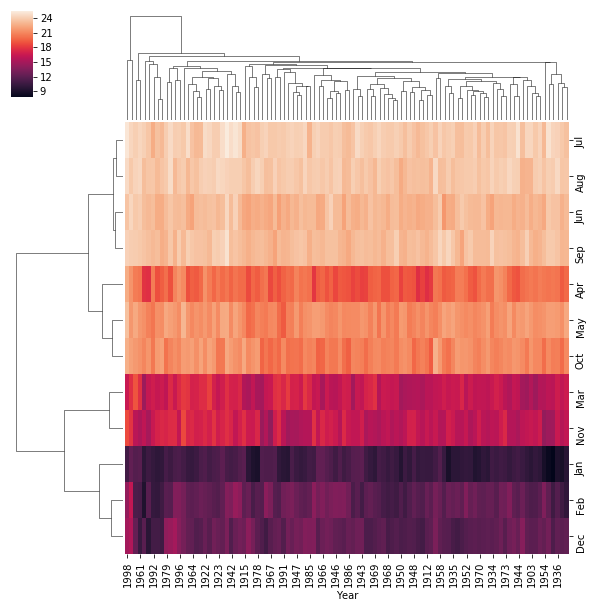

In [17]:
sns.clustermap(temp_data_matrix)

In [8]:
average_temp_year = pd.DataFrame({'average_temp_year': temp_data_matrix.mean(axis=0)})#creating a dataframe from dictonary.
#axis value 0 means operations are performed column wise.
average_temp_year = average_temp_year.transpose()
average_temp_year.head()

Year,1901,1902,1903,1904,1905,1906,1907,1908,1909,1910,...,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002
average_temp_year,18.734167,18.437,18.573417,18.569,18.107333,18.62625,18.44,18.8095,18.962167,18.154583,...,18.380667,19.251833,19.585167,19.3325,19.288,20.225667,20.206083,19.434,19.902583,19.32775


Text(0.5, 1.0, 'Monthly minimum temperature across all years')

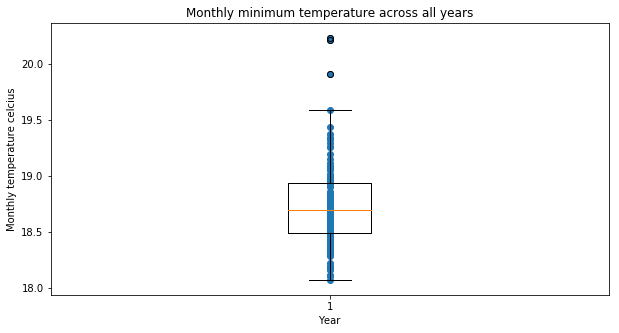

In [9]:
plt.figure(figsize=(10,5))
plt.boxplot(average_temp_year)

plt.scatter(x=np.ones(len(average_temp_year.columns)), y=average_temp_year.ix[0])
plt.xlabel('Year')
plt.ylabel('Monthly temperature celcius')

plt.title('Monthly minimum temperature across all years')


In [10]:
temp_data_matrix_np = temp_data_matrix.as_matrix()
#coverted dataframe into numpy matrix so that it can be easly reshaped index and column name are not included in the matrix

shape = temp_data_matrix_np.shape
print("shape belore reshaping :",shape)
temp_data_matrix_np = np.reshape(temp_data_matrix_np,(shape[0] * shape[1], 1),order='F')
print("shape after reshaping :", temp_data_matrix_np.shape)

shape belore reshaping : (12, 102)
shape after reshaping : (1224, 1)


Reshaped data are stacked year wise data

# Splitting the data in train and test set
## Train 1901-1981
## Test   1982-2002

In [11]:
temp_data = pd.DataFrame({'Temperature': temp_data_matrix_np[:,0]})
temp_data.set_index(dates, inplace=True)
#splitting the data into train and test set (80-20)

train_temp_data = temp_data.ix[: '1981']
test_temp_data = temp_data.ix['1982':]

print(train_temp_data.head())
print(train_temp_data.tail())
print(test_temp_data.head())
print(test_temp_data.tail())

            Temperature
1901-01-01       10.048
1901-02-01       12.167
1901-03-01       16.195
1901-04-01       20.599
1901-05-01       21.546
            Temperature
1981-08-01       24.105
1981-09-01       23.575
1981-10-01       20.904
1981-11-01       16.749
1981-12-01       13.016
            Temperature
1982-01-01       11.495
1982-02-01       13.496
1982-03-01       16.320
1982-04-01       19.402
1982-05-01       21.666
            Temperature
2002-08-01       24.149
2002-09-01       23.447
2002-10-01       21.279
2002-11-01       17.067
2002-12-01       13.000


# Visualization of temperature data 

Text(0.5, 1.0, 'Monthly minimum temperature across all years')

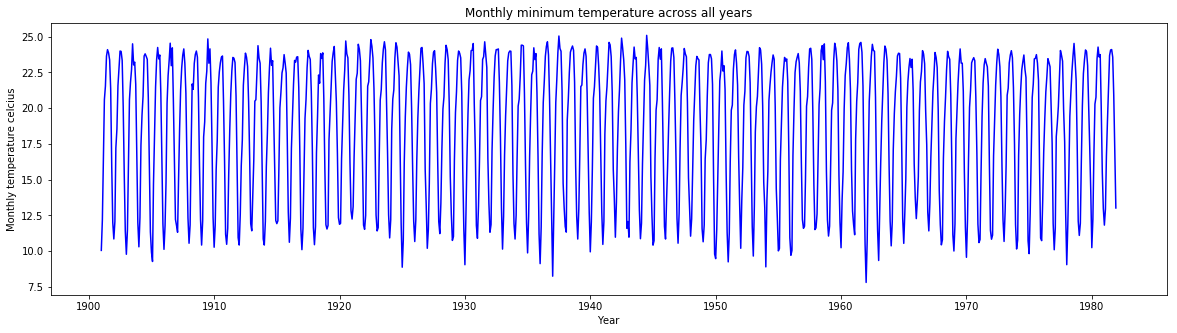

In [12]:
plt.figure(figsize=(20,5))
plt.plot(train_temp_data, color='blue')
plt.xlabel('Year')
plt.ylabel('Monthly temperature celcius')

plt.title('Monthly minimum temperature across all years')


# Zoomed in visualzation for first 5 years

Text(0.5, 1.0, 'Monthly minimum temperature across all years')

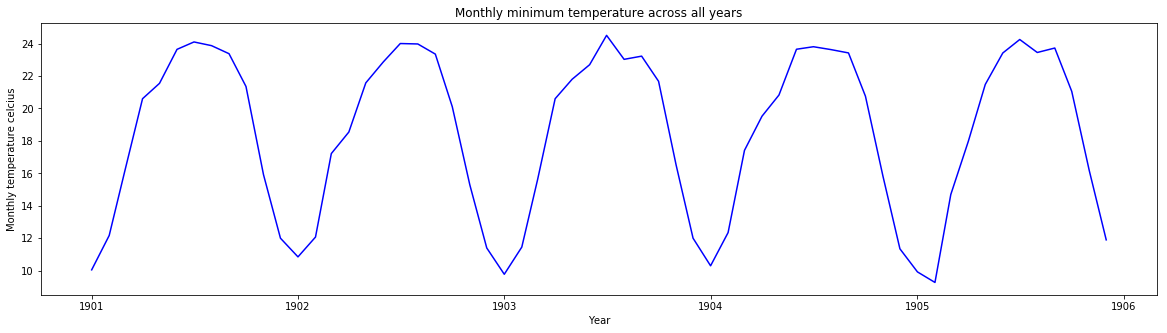

In [13]:
plt.figure(figsize=(20,5))
plt.plot(train_temp_data.ix[:60], color='blue')
plt.xlabel('Year')
plt.ylabel('Monthly temperature celcius')

plt.title('Monthly minimum temperature across all years')


# Decomposition os temperature data

In [14]:
decomposition = sm.tsa.seasonal_decompose(temp_data, model='additive')

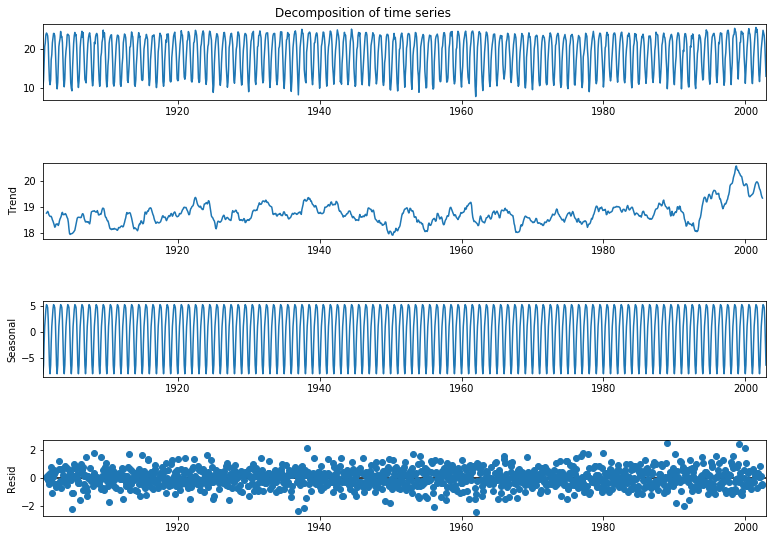

In [15]:
fig = decomposition.plot()
fig.set_figwidth(12)
fig.set_figheight(8)
fig.suptitle('Decomposition of time series')
plt.show()

# Stationarity:
A time series is said to be stationary if its statistical properties such as mean, variance remain constant over time.
The basic assumption before applying different models like ARIMA is that the time series should be stationary.
How to formally check stationarity?
There are two tests to check whether a time series is stationary or not.
## Rolling statistics (Visual test) - 
We can plot the moving average or moving variance and see if it varies with time. By moving average/variance we mean that at any instant 't', we'll take the average/variance of the last year, i.e. last 12 months. But again this is more of a visual technique.
## Dickey Fuller test - 
This is one of the statistical tests for checking stationarity. Here the null hypothesis is that the TS is non-stationary. The test results comprise of a Test Statistic and some Critical Values for difference confidence levels. If the ‘Test Statistic’ is less than the ‘Critical Value’, we can reject the null hypothesis and say that the series is stationary.

In [16]:
def test_stationary(timeseries, window=12):
    
    # Rolling statistics
    movingAverage = timeseries.rolling(window=window).mean()
    movingSTD = timeseries.rolling(window=window).std()
    
    # Plot rolling statistics
    plt.figure(figsize=(20,5))
    plt.plot(timeseries, color='blue', label='Original')
    plt.plot(movingAverage, color='red', label='Rolling Mean')
    plt.plot(movingSTD, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation\n')
    plt.show(block=False)
    
    # Dickey Fuller test
    print('Results of Dickey Fuller Test:\n')
    dftest = adfuller(timeseries.iloc[:,0], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 'No. of Lags used', 'Number of observations used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' %key] = value
    print(dfoutput)

# Testing the stationarity of data

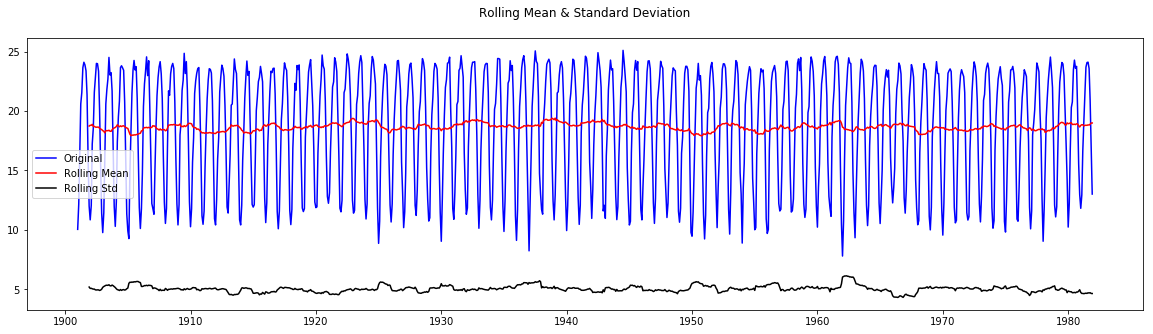

Results of Dickey Fuller Test:

Test Statistic                  -5.622115
p-value                          0.000001
No. of Lags used                22.000000
Number of observations used    949.000000
Critical Value (1%)             -3.437259
Critical Value (5%)             -2.864590
Critical Value (10%)            -2.568394
dtype: float64


In [17]:
test_stationary(train_temp_data, window=12)

# Analysis
As we could see, p-value is very less. Also, "Test statistic" is less compared to "Critical Value".
Therefore, Null hypothesis is rejected, which means, Time series is stationary.
Next steps:
As time series is stationary, differencing is not required.
Now, we have to find p and q values by plotting ACF and PACF plots.

# ACF and PACF plots

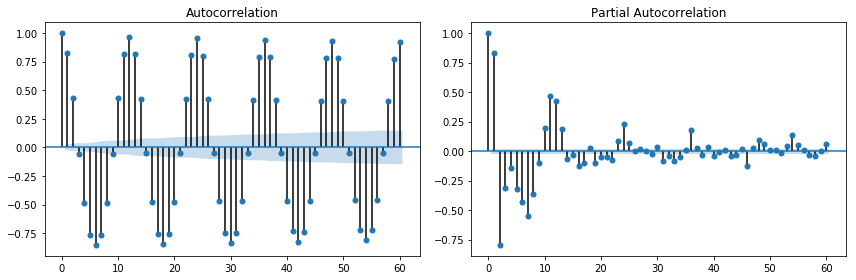

In [18]:
fig, axes = plt.subplots(1, 2, sharey=False, sharex=False)
fig.set_figwidth(12)
fig.set_figheight(4)
smt.graphics.plot_acf(train_temp_data, lags=60, ax=axes[0], alpha=0.5)
smt.graphics.plot_pacf(train_temp_data, lags=60, ax=axes[1], alpha=0.5)
plt.tight_layout()

# Apply Differencing D = 1

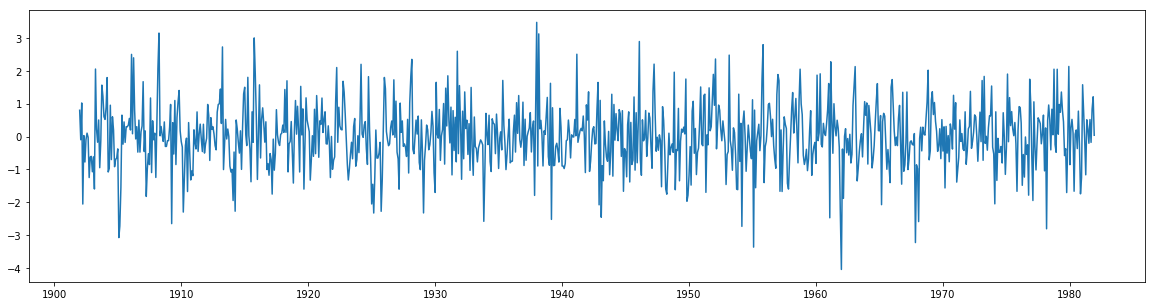

In [19]:
diff_12 = train_temp_data.diff(periods=12)
diff_12.dropna(inplace=True)

plt.figure(figsize=(20,5))
plt.plot(diff_12)

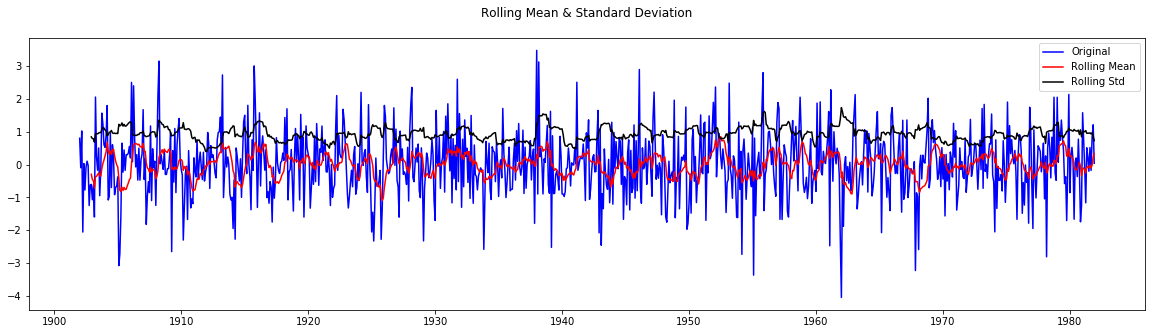

Results of Dickey Fuller Test:

Test Statistic                -1.119923e+01
p-value                        2.265685e-20
No. of Lags used               1.200000e+01
Number of observations used    9.470000e+02
Critical Value (1%)           -3.437274e+00
Critical Value (5%)           -2.864597e+00
Critical Value (10%)          -2.568398e+00
dtype: float64


In [20]:
test_stationary(diff_12)

If there is seasonality, it will be better if we try all combinations of different parameters and choose the best set ofparameters that gives less AIC score.

# Parameters - p, d, q, P, D, Q

In [21]:
# Define the p, d and q parameters to take any value between 0 and 2
p = q = range(1, 3);
d=range(0,2);

# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [22]:
pdq
# it is a list of tuples

[(1, 0, 1),
 (1, 0, 2),
 (1, 1, 1),
 (1, 1, 2),
 (2, 0, 1),
 (2, 0, 2),
 (2, 1, 1),
 (2, 1, 2)]

In [23]:
seasonal_pdq
# it is a list of tuples

[(1, 0, 1, 12),
 (1, 0, 2, 12),
 (1, 1, 1, 12),
 (1, 1, 2, 12),
 (2, 0, 1, 12),
 (2, 0, 2, 12),
 (2, 1, 1, 12),
 (2, 1, 2, 12)]

In [26]:
AIC_scores_list = []
print("Total Steps",len(pdq)*len(seasonal_pdq))
# this gives total steps as function is a combination of pdq, seasonal_pdq

Total Steps 64


# Finding the best parameters
We iterate through all possible parameters combination and find the best parameter combination corresponding that is giving the best result- best AIC score or best R sqaure value.
    *Best AIC score- Least Value of AIC
    *Best R squared value- maximum value of R squared value The coefficient of determination or R squared, is a statistical measure of how close the data pairs in a set are to their fitted regression line. This measure ranges from 0 to 1, indicating the extent to which the dependent variable in a data set is predictable. An R squared of 0 means that the dependent variable cannot be predicted by the independent variable, while an R squared of 1 means that it can be predicted without error.

In [28]:
best_aic = np.inf # setting aic value to maximum
best_pdq = None
best_seasonal_pdq = None
temp_model = None
best_model=None
total_steps=len(pdq)*len(seasonal_pdq);
print("Total Steps",total_steps)
i=1;
for param in pdq:
    for param_seasonal in seasonal_pdq:        
        try:
            print("Step",i,"of",total_steps)
            i=i+1;
            temp_model = sm.tsa.statespace.SARIMAX(train_temp_data,
                                             order = param,
                                             seasonal_order = param_seasonal,
                                             enforce_stationarity=True,
                                             enforce_invertibility=True)
            results = temp_model.fit()
            l = []
            l.append(param[0])
            l.append(param[1])
            l.append(param[2])
            l.append(param_seasonal[0])
            l.append(param_seasonal[1])
            l.append(param_seasonal[2])
            l.append(param_seasonal[3])
            l.append(results.aic)
            AIC_scores_list.append(l)
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
                best_model=temp_model
        except:
            continue

print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))

Total Steps 64
Step 1 of 64
Step 2 of 64
Step 3 of 64
Step 4 of 64
Step 5 of 64
Step 6 of 64
Step 7 of 64
Step 8 of 64
Step 9 of 64
Step 10 of 64
Step 11 of 64
Step 12 of 64
Step 13 of 64
Step 14 of 64
Step 15 of 64
Step 16 of 64
Step 17 of 64
Step 18 of 64
Step 19 of 64
Step 20 of 64
Step 21 of 64
Step 22 of 64
Step 23 of 64
Step 24 of 64
Step 25 of 64
Step 26 of 64
Step 27 of 64
Step 28 of 64
Step 29 of 64
Step 30 of 64
Step 31 of 64
Step 32 of 64
Step 33 of 64
Step 34 of 64
Step 35 of 64
Step 36 of 64
Step 37 of 64
Step 38 of 64
Step 39 of 64
Step 40 of 64
Step 41 of 64
Step 42 of 64
Step 43 of 64
Step 44 of 64
Step 45 of 64
Step 46 of 64
Step 47 of 64
Step 48 of 64
Step 49 of 64
Step 50 of 64
Step 51 of 64
Step 52 of 64
Step 53 of 64
Step 54 of 64
Step 55 of 64
Step 56 of 64
Step 57 of 64
Step 58 of 64
Step 59 of 64
Step 60 of 64
Step 61 of 64
Step 62 of 64
Step 63 of 64
Step 64 of 64
Best SARIMAX(2, 0, 1)x(1, 1, 1, 12)12 model - AIC:2091.8126561531526


In [29]:
AIC_scores = pd.DataFrame.from_records(AIC_scores_list)
AIC_scores.columns=['p', 'd', 'q', 'P', 'D', 'Q', 's', 'AIC']
AIC_scores.iloc[AIC_scores['AIC'].argmin()] #finding parameters with minimum AIC value

p         2.000000
d         0.000000
q         1.000000
P         1.000000
D         1.000000
Q         1.000000
s        12.000000
AIC    2091.812656
Name: 32, dtype: float64

In [30]:
AIC_scores

,p,d,q,P,D,Q,s,AIC
0,1,0,1,1,0,1,12,2232.582980
1,1,0,1,1,0,2,12,2220.641926
2,1,0,1,1,1,1,12,2093.467583
3,1,0,1,1,1,2,12,2096.266581
4,1,0,1,2,0,2,12,2213.198754
5,1,0,1,2,1,1,12,2094.412310
6,1,0,1,2,1,2,12,2097.238745
7,1,0,2,1,0,1,12,2203.284422
8,1,0,2,1,0,2,12,2204.168128
9,1,0,2,1,1,1,12,2093.615689


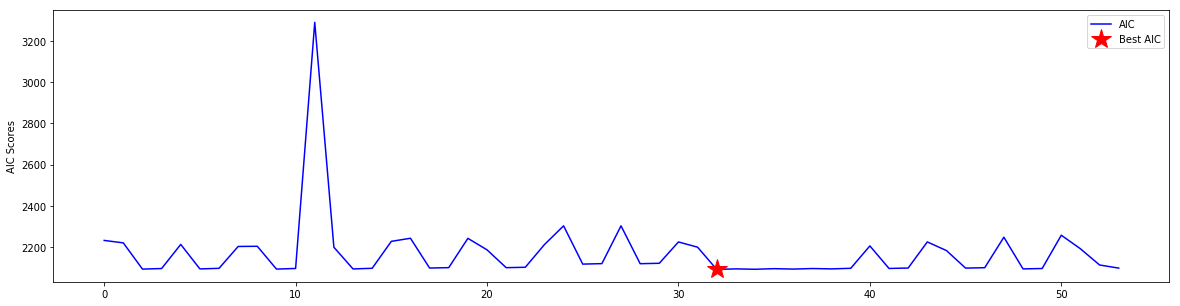

In [31]:
plt.figure(figsize=(20,5))
plt.plot(AIC_scores.AIC, color='blue',label="AIC")
plt.plot(32, AIC_scores.AIC[32], 'r*',markersize=20,label="Best AIC")
plt.ylabel("AIC Scores")
plt.legend(loc="best")

# Analysis:
After fitting the data with different combination of models, we got the best parameters as following:
p = 2, d = 1, q = 1
P = 2, D = 1, Q = 1
s = 12

In [32]:
best_pdq = (2, 0, 1)
best_seasonal_pdq = (1, 1, 1, 12)

In [33]:
best_model = sm.tsa.statespace.SARIMAX(train_temp_data,
                                      order=best_pdq,
                                      seasonal_order=best_seasonal_pdq,
                                      enforce_stationarity=True,
                                      enforce_invertibility=True)
best_results = best_model.fit()

In [34]:
print(best_results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                        Temperature   No. Observations:                  972
Model:             SARIMAX(2, 0, 1)x(1, 1, 1, 12)   Log Likelihood               -1039.906
Date:                            Mon, 23 Mar 2020   AIC                           2091.813
Time:                                    17:12:23   BIC                           2121.014
Sample:                                01-01-1901   HQIC                          2102.933
                                     - 12-01-1981                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3738      0.216     -1.732      0.083      -0.797       0.049
ar.L2          0.1919      0.041   

# Finding the best fitting line

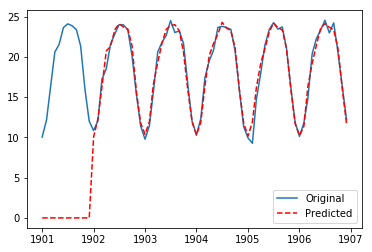

In [35]:
plt.plot(train_temp_data.head(72),label="Original");
plt.plot(best_results.fittedvalues.head(72),color='red',linestyle='--',label="Predicted");
plt.legend(loc="best");

In [36]:
fitted_temp_data=best_results.fittedvalues
print("fitted Values")
print(fitted_temp_data.head())

print(fitted_temp_data.tail())
print("original values")
print(train_temp_data.head())
print(train_temp_data.tail())

fitted Values
1901-01-01    0.000000
1901-02-01    0.000002
1901-03-01    0.000003
1901-04-01    0.000004
1901-05-01    0.000006
Freq: MS, dtype: float64
1981-08-01    23.880998
1981-09-01    23.487528
1981-10-01    21.039854
1981-11-01    16.174320
1981-12-01    12.214874
Freq: MS, dtype: float64
original values
            Temperature
1901-01-01       10.048
1901-02-01       12.167
1901-03-01       16.195
1901-04-01       20.599
1901-05-01       21.546
            Temperature
1981-08-01       24.105
1981-09-01       23.575
1981-10-01       20.904
1981-11-01       16.749
1981-12-01       13.016


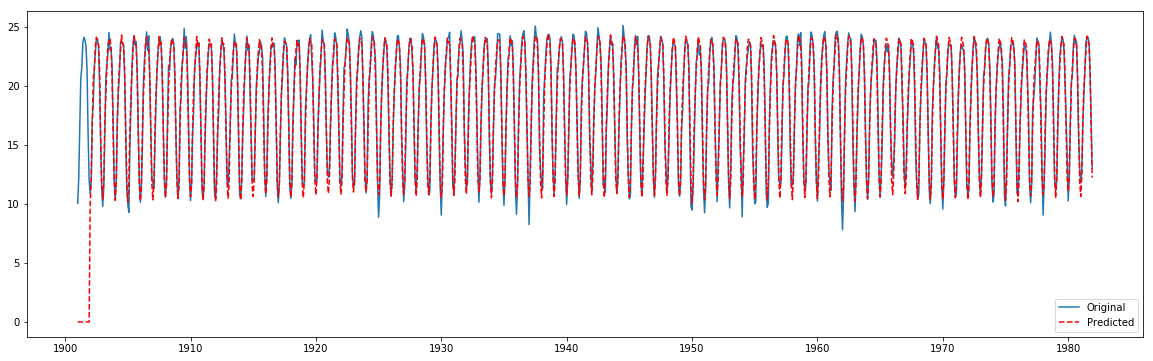

In [39]:
plt.plot(train_temp_data,label="Original");
plt.plot(best_results.fittedvalues,color='red',linestyle='--',label="Predicted");
plt.legend(loc="best");

# Dynamic Predictions
The dynamic keyword affects in-sample prediction. If dynamic is False, then the in-sample lagged values are used for prediction. If dynamic is True, then in-sample forecasts are used in place of lagged dependent variables. The first forecast value is start .
# In sample and Out sample
In-sample is data that you know at the time of modell builing and that you use to build that model. Out-of-sample is data that was unseen and you only produce the prediction/forecast one it. Under most circumnstances the model will perform worse out-of-sample than in-sample where all parameters have been calibrated.

In [40]:
pred_temp_data = best_results.get_prediction(start=pd.to_datetime('1982-01-01'),end=pd.to_datetime('2002-12-01'), dynamic=False, full_results=True)
pred_temp_data_ci = pred_temp_data.conf_int(alpha=0.01)
print(train_temp_data.head())


            Temperature
1901-01-01       10.048
1901-02-01       12.167
1901-03-01       16.195
1901-04-01       20.599
1901-05-01       21.546


In [41]:
print("Predicted Values")
print(pred_temp_data.predicted_mean.head())
print(pred_temp_data.predicted_mean.tail())
print('\n')
print("Fitted Values")
print(fitted_temp_data.head())
print(fitted_temp_data.tail())

Predicted Values
1982-01-01    10.767996
1982-02-01    12.193821
1982-03-01    16.423801
1982-04-01    19.712417
1982-05-01    21.405258
Freq: MS, dtype: float64
2002-08-01    23.839645
2002-09-01    23.454160
2002-10-01    21.012066
2002-11-01    16.230414
2002-12-01    12.097908
Freq: MS, dtype: float64


Fitted Values
1901-01-01    0.000000
1901-02-01    0.000002
1901-03-01    0.000003
1901-04-01    0.000004
1901-05-01    0.000006
Freq: MS, dtype: float64
1981-08-01    23.880998
1981-09-01    23.487528
1981-10-01    21.039854
1981-11-01    16.174320
1981-12-01    12.214874
Freq: MS, dtype: float64


# Forecasting the future values

In [42]:
# Get forecast 252 steps (21 years) ahead in future
n_steps = 252
pred_uc_95 = best_results.get_forecast(steps=n_steps) # alpha=0.05 95% Confidence Interval
print(pred_uc_95.predicted_mean.head())
# Get confidence intervals 95% of the forecasts
pred_ci_95 = pred_uc_95.conf_int(alpha=0.05)

print(pred_ci_95.head())

1982-01-01    10.767996
1982-02-01    12.193821
1982-03-01    16.423801
1982-04-01    19.712417
1982-05-01    21.405258
Freq: MS, dtype: float64
            lower Temperature  upper Temperature
1982-01-01           9.395886          12.140106
1982-02-01          10.800063          13.587580
1982-03-01          15.019490          17.828112
1982-04-01          18.308000          21.116834
1982-05-01          20.000287          22.810228


In [44]:
index = pd.date_range(train_temp_data.index[-1] + 1, periods=n_steps, freq='MS')
print(index)
forecast_data = pd.DataFrame(np.column_stack([pred_uc_95.predicted_mean, pred_ci_95]), 
                     index=index, columns=['forecast', 'lower_ci_95', 'upper_ci_95'])
print("HEAD")
print(forecast_data.head())
print("TAIL")
print(forecast_data.tail())

DatetimeIndex(['1982-01-01', '1982-02-01', '1982-03-01', '1982-04-01',
               '1982-05-01', '1982-06-01', '1982-07-01', '1982-08-01',
               '1982-09-01', '1982-10-01',
               ...
               '2002-03-01', '2002-04-01', '2002-05-01', '2002-06-01',
               '2002-07-01', '2002-08-01', '2002-09-01', '2002-10-01',
               '2002-11-01', '2002-12-01'],
              dtype='datetime64[ns]', length=252, freq='MS')
HEAD
             forecast  lower_ci_95  upper_ci_95
1982-01-01  10.767996     9.395886    12.140106
1982-02-01  12.193821    10.800063    13.587580
1982-03-01  16.423801    15.019490    17.828112
1982-04-01  19.712417    18.308000    21.116834
1982-05-01  21.405258    20.000287    22.810228
TAIL
             forecast  lower_ci_95  upper_ci_95
2002-08-01  23.839645    22.432897    25.246392
2002-09-01  23.454160    22.047412    24.860907
2002-10-01  21.012066    19.605319    22.418813
2002-11-01  16.230414    14.823669    17.637160
2002-12-01 

# Forecast from 1982-2002

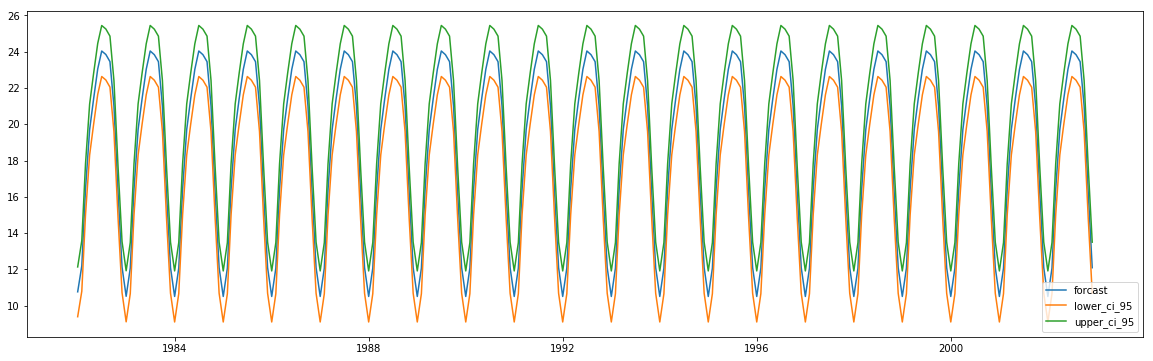

In [45]:
[a,b,c]=plt.plot(forecast_data[['forecast','lower_ci_95','upper_ci_95']])
plt.legend([a,b,c],['forcast', 'lower_ci_95' , 'upper_ci_95'],loc='best')

In [46]:
forecast_temp_data=forecast_data["forecast"]
print("predicted temperature data")
print(pred_temp_data.predicted_mean.head())
print("forecasted temperature data")
print(forecast_temp_data.head())

predicted temperature data
1982-01-01    10.767996
1982-02-01    12.193821
1982-03-01    16.423801
1982-04-01    19.712417
1982-05-01    21.405258
Freq: MS, dtype: float64
forecasted temperature data
1982-01-01    10.767996
1982-02-01    12.193821
1982-03-01    16.423801
1982-04-01    19.712417
1982-05-01    21.405258
Freq: MS, Name: forecast, dtype: float64


In [47]:
import math
mse = math.sqrt(((np.array(best_results.fittedvalues) - np.array(train_temp_data)) ** 2).mean())
print('The Mean Squared Error of our predictions is {}'.format(round(mse, 4)))

The Mean Squared Error of our predictions is 7.1194


In [50]:
#pred_rainfall_data.predicted_mean.index=["Precipitation"]
pred_mean_temp_data=pred_temp_data.predicted_mean
pred_mean_temp_data.columns=["Temperature"]
print("predicted temperature data")
print(pred_mean_temp_data.head())
print("original temperature data")
print(test_temp_data.head())


predicted temperature data
1982-01-01    10.767996
1982-02-01    12.193821
1982-03-01    16.423801
1982-04-01    19.712417
1982-05-01    21.405258
Freq: MS, dtype: float64
original temperature data
            Temperature
1982-01-01       11.495
1982-02-01       13.496
1982-03-01       16.320
1982-04-01       19.402
1982-05-01       21.666


Text(0, 0.5, 'Temperature in degree celcius')

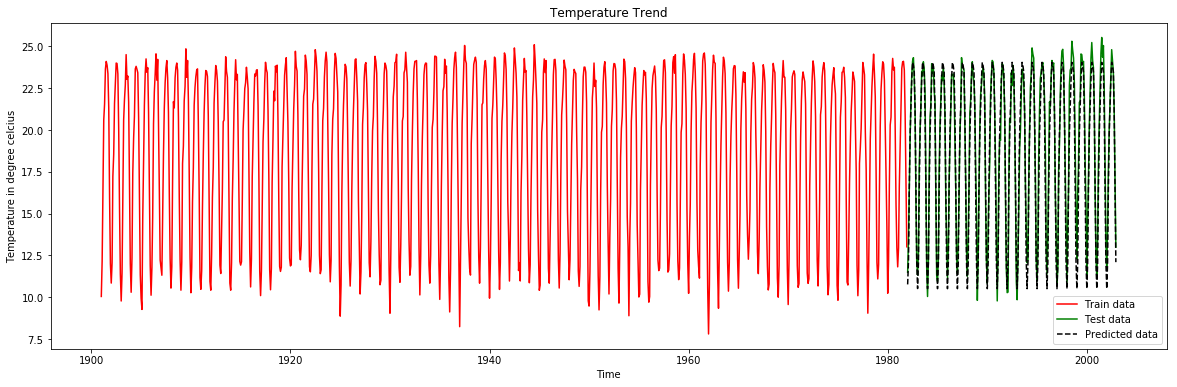

In [51]:
fig=plt.figure(figsize=(20,6));
plt.plot(train_temp_data,color='red',label="Train data")
plt.plot(test_temp_data,color="green",label="Test data")
plt.plot(pred_mean_temp_data,color="black",linestyle="--",label="Predicted data")
plt.legend(loc="best")
plt.title("Temperature Trend")
plt.xlabel("Time")
plt.ylabel("Temperature in degree celcius")

Text(0, 0.5, 'Temperature in degree celcius')

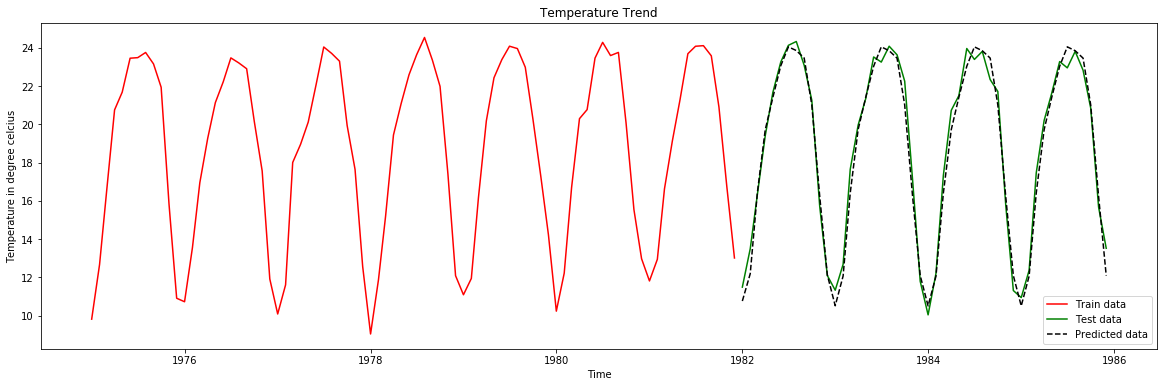

In [52]:
fig=plt.figure(figsize=(20,6));
plt.plot(train_temp_data['1975':],color='red',label="Train data")
plt.plot(test_temp_data[:'1985'],color="green",label="Test data")
plt.plot(pred_mean_temp_data[:'1985'],color="black",linestyle="--",label="Predicted data")
plt.legend(loc="best")
plt.title("Temperature Trend")
plt.xlabel("Time")
plt.ylabel("Temperature in degree celcius")

Text(0, 0.5, 'Temperature in mm')

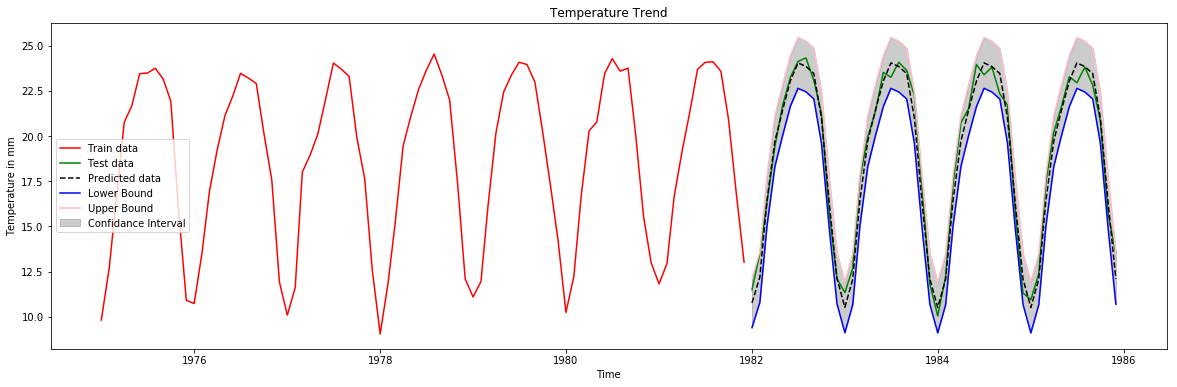

In [54]:
fig=plt.figure(figsize=(20,6));
plt.plot(train_temp_data['1975':],color='red',label="Train data")
plt.plot(test_temp_data[:'1985'],color="green",label="Test data")
plt.plot(pred_mean_temp_data[:'1985'],color="black",linestyle="--",label="Predicted data")
plt.plot(pred_ci_95[:'1985']["lower Temperature"],color='blue',label="Lower Bound")
plt.plot(pred_ci_95[:'1985']["upper Temperature"],color='pink',label="Upper Bound")
index = pd.date_range('1982-01-01', periods=48, freq='MS')
plt.fill_between(index,pred_ci_95.loc[:'1985-12-01']['lower Temperature'],pred_ci_95.loc[:'1985-12-01'][ 'upper Temperature'], color='k', alpha=0.2,label="Confidance Interval")
plt.legend(loc="best")
plt.title("Temperature Trend")
plt.xlabel("Time")
plt.ylabel("Temperature in mm")

# END